In [7]:
import PyCC
import numpy as np
import matplotlib.pyplot as plt

def plot_pretty(dpi=200,fontsize=10):
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in')
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5)
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5)
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    plt.rc('legend',fontsize=5)
    plt.rcParams['figure.figsize'] = [5, 3]

plot_pretty()

In [2]:
G = 1
eps = 0
a = 1
M = 1
nsteps = 200
atol = 1e-3

runs = {100:{},1000:{},10000:{},100000:{}}

In [3]:
for n in runs.keys():

    print(n,end=": ")
    df = PyCC.Distributions.Plummer(n,a,M,G)
    print(df.shape)

    dt,tol = PyCC.find_timestep(df,1/64,atol=atol,eps=0,G=1,precision="f4",accelerate=True)
    print("dt =",dt,"tol =",tol)
    runs[n]["df"] = df
    runs[n]["dt"] = dt
    runs[n]["tol"] = tol
    runs[n]["mass"] = df.loc[:,"mass"][0]

100: (100, 7)
dt = 0.015625 tol = 6.2584877e-06
1000: (1000, 7)
dt = 0.015625 tol = 2.4050474e-05
10000: (10000, 7)
dt = 0.015625 tol = 0.0002963543
100000: (100000, 7)
dt = 0.0078125 tol = 0.0003592968


In [4]:
for n in runs.keys():
    print(n)
    out,stats = PyCC.evaluate(runs[n]["df"],steps=nsteps,eps=eps,G=G,dt = runs[n]["dt"],precision="f4",accelerate=True)
    runs[n]["out"] = PyCC.outdf2numpy(out)
    

100
1000
10000
100000


In [5]:
for n in runs.keys():
    vel = runs[n]["out"]["vel"]
    gpe = runs[n]["out"]["gpe"]

    speeds = np.linalg.norm(vel,axis=2)
    kes = (0.5) * runs[n]["mass"] * (speeds**2)
    ke_tot = np.sum(kes,axis=1)

    gpe_tot = np.sum(gpe,axis=1).flatten()/2

    runs[n]["ke"] = ke_tot
    runs[n]["gpe"] = gpe_tot
    runs[n]["e_tot"] = ke_tot + gpe_tot

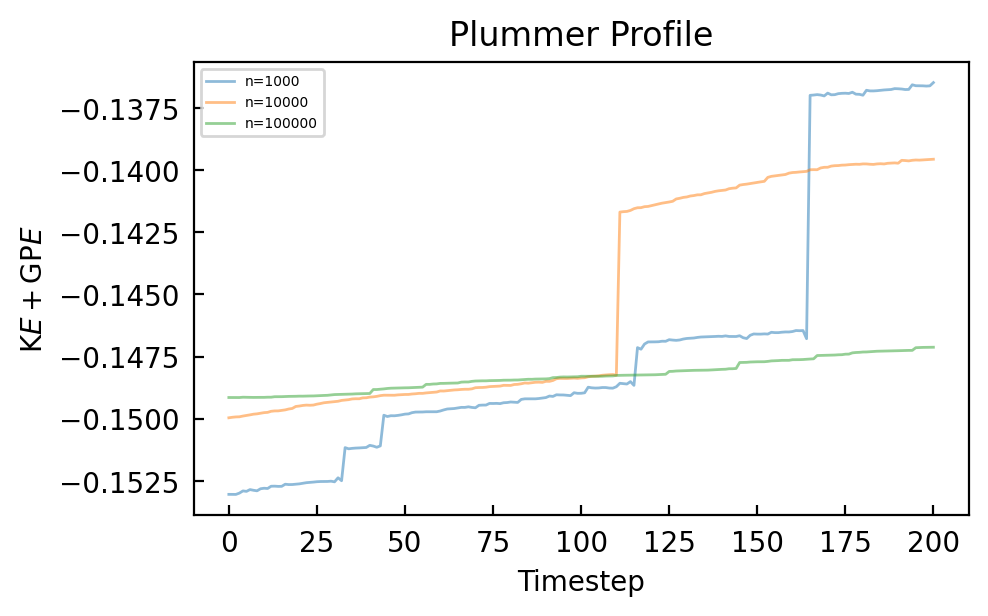

In [10]:
for n in list(runs.keys())[1:]:
    plt.plot((runs[n]["e_tot"]),label="n=" + str(n),alpha=0.5,linewidth=1)

plt.title("Plummer Profile")
plt.xlabel("Timestep")
plt.ylabel(r"K$E + $GP$E$")
plt.legend()
plt.savefig("Plummer_compareN_steps200.jpg")
plt.show()